## Logistic Regression

### Importing Required Libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)

### Reading Dataset

In [47]:
loan = pd.read_csv('./lending_club_loan_two.csv')

In [48]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [49]:
loan.iloc[0:10, 0:10]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0
5,20000.0,36 months,13.33,677.07,C,C3,HR Specialist,10+ years,MORTGAGE,86788.0
6,18000.0,36 months,5.32,542.07,A,A1,Software Development Engineer,2 years,MORTGAGE,125000.0
7,13000.0,36 months,11.14,426.47,B,B2,Office Depot,10+ years,RENT,46000.0
8,18900.0,60 months,10.99,410.84,B,B3,Application Architect,10+ years,RENT,103000.0
9,26300.0,36 months,16.29,928.40,C,C5,Regado Biosciences,3 years,MORTGAGE,115000.0


In [50]:
loan.iloc[0:10, 10:]

,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
5,Verified,Sep-2015,Fully Paid,debt_consolidation,Debt consolidation,16.31,Jan-2005,8.0,0.0,25757.0,100.6,23.0,f,INDIVIDUAL,4.0,0.0,1726 Cooper Passage Suite 129\r\nNorth Deniseb...
6,Source Verified,Sep-2015,Fully Paid,home_improvement,Home improvement,1.36,Aug-2005,8.0,0.0,4178.0,4.9,25.0,f,INDIVIDUAL,3.0,0.0,"1008 Erika Vista Suite 748\r\nEast Stephanie, ..."
7,Not Verified,Sep-2012,Fully Paid,credit_card,No More Credit Cards,26.87,Sep-1994,11.0,0.0,13425.0,64.5,15.0,f,INDIVIDUAL,0.0,0.0,USCGC Nunez\r\nFPO AE 30723
8,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,12.52,Jun-1994,13.0,0.0,18637.0,32.9,40.0,w,INDIVIDUAL,3.0,0.0,USCGC Tran\r\nFPO AP 22690
9,Verified,Apr-2012,Fully Paid,debt_consolidation,Debt Consolidation,23.69,Dec-1997,13.0,0.0,22171.0,82.4,37.0,f,INDIVIDUAL,1.0,0.0,"3390 Luis Rue\r\nMauricestad, VA 00813"


### Data Preprocessing

#### Remapping Target Variable Values

In [51]:
loan['loan_status'].replace(to_replace='Fully Paid', value=1, inplace=True)
loan['loan_status'].replace(to_replace='Charged Off', value=0, inplace=True)

#### Count of Nulls

In [52]:
loan.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

#### Percentage of Nulls

In [53]:
100*loan.isnull().sum()/len(loan)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

#### Dropping columns not required for analysis

In [54]:
from sklearn.impute import SimpleImputer,KNNImputer

In [55]:
loan.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status               int64
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

In [59]:
loan.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [60]:
X_im=loan[['loan_amnt','int_rate','installment','annual_inc','mort_acc','pub_rec_bankruptcies']]
y_im=loan['loan_status']

In [61]:
knn_im=KNNImputer()
X_im_2=knn_im.fit_transform(X_im)

In [63]:
pd.DataFrame(X_im_2,columns=X_im.columns)

,loan_amnt,int_rate,installment,annual_inc,mort_acc,pub_rec_bankruptcies
0,10000.0,11.44,329.48,117000.0,0.0,0.0
1,8000.0,11.99,265.68,65000.0,3.0,0.0
2,15600.0,10.49,506.97,43057.0,0.0,0.0
3,7200.0,6.49,220.65,54000.0,0.0,0.0
4,24375.0,17.27,609.33,55000.0,1.0,0.0
...,...,...,...,...,...,...
396025,10000.0,10.99,217.38,40000.0,0.0,0.0
396026,21000.0,12.29,700.42,110000.0,1.0,0.0
396027,5000.0,9.99,161.32,56500.0,0.0,0.0
396028,21000.0,15.31,503.02,64000.0,5.0,0.0


In [9]:
loan['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

Too many unique job titles to convert to a dummy variable feature. Removing emp_title column.

In [10]:
loan = loan.drop('emp_title',axis=1)

<Axes: xlabel='emp_length', ylabel='loan_status'>

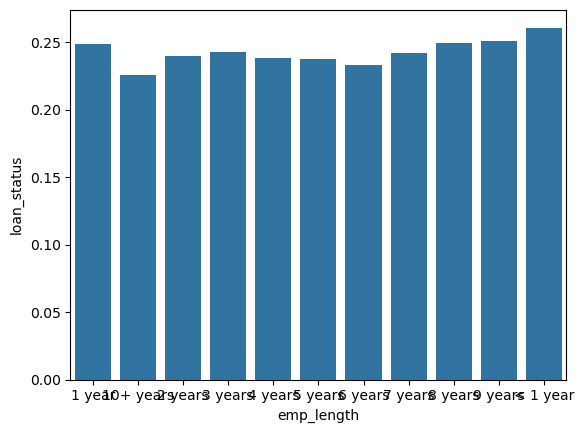

In [11]:
emp_co = loan[loan['loan_status']==0].groupby("emp_length").count()['loan_status']
emp_fp = loan[loan['loan_status']==1].groupby("emp_length").count()['loan_status']
emp_len = emp_co/emp_fp
emp_len
sns.barplot(emp_len)

Charge off rates are similar across all employment lengths. Dropping the emp_length column.

In [12]:
loan = loan.drop('emp_length', axis=1)

In [13]:
loan.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [14]:
loan.dropna(inplace=True)

In [15]:
loan.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

Dropping all null rows.

In [16]:
loan['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [17]:
loan['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

Title column is similar to the purpose column. Dropping the title column.

In [18]:
loan = loan.drop('title', axis=1)

In [19]:
loan['mort_acc'].value_counts()

mort_acc
0.0     139053
1.0      60073
2.0      49653
3.0      37820
4.0      27715
5.0      18108
6.0      11011
7.0       6020
8.0       3108
9.0       1648
10.0       862
11.0       478
12.0       263
13.0       146
14.0       107
15.0        61
16.0        37
17.0        21
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [20]:
loan['term'].value_counts()

term
36 months    272387
60 months     83882
Name: count, dtype: int64

Getting number of months from term.

In [21]:
# loan['term'] = loan['term'].apply(lambda term: int(term[:3]))
# loan['term']

Dropping grade as it is a redundant column.

In [22]:
loan = loan.drop('grade',axis=1)

In [23]:
loan['home_ownership'].value_counts()

home_ownership
MORTGAGE    180682
RENT        140983
OWN          34538
OTHER           34
NONE            29
ANY              3
Name: count, dtype: int64

Combining NONE and ANY with OTHER for home_ownership.

In [24]:
loan['home_ownership'] = loan['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

Getting last 5 characters of address as zip_code.

In [25]:
loan['zip_code'] = loan['address'].apply(lambda address:address[-5:])

Dropping issue date of loan.

In [26]:
loan = loan.drop('issue_d',axis=1)

Getting last 4 characters of earliest_cr_line as earliest_cr_year.

In [27]:
loan['earliest_cr_year'] = loan['earliest_cr_line'].apply(lambda date:int(date[-4:]))

In [28]:
loan = loan.drop(['address', 'earliest_cr_line', 'zip_code', 'earliest_cr_year'],axis=1)

In [29]:
loan=loan[loan['home_ownership']!='OTHER']

In [30]:
loan['verification_status'].value_counts()

verification_status
Verified           126535
Source Verified    120488
Not Verified       109180
Name: count, dtype: int64

In [31]:
np.array(sorted(loan['sub_grade'].value_counts().index))
np.array(sorted(loan['verification_status'].value_counts().index))

array(['Not Verified', 'Source Verified', 'Verified'], dtype='<U15')

In [32]:
from sklearn.preprocessing import OrdinalEncoder

In [33]:
loan=loan.drop('application_type',axis=1) # 99% is individual

In [34]:
loan['purpose'].value_counts()/len(loan) * 100

purpose
debt_consolidation    60.440255
credit_card           21.700828
home_improvement       5.950259
other                  4.900857
major_purchase         1.907620
small_business         1.097969
medical                0.992692
car                    0.917454
moving                 0.655806
vacation               0.592078
house                  0.508699
wedding                0.268386
renewable_energy       0.066816
educational            0.000281
Name: count, dtype: float64

In [35]:
np.array(loan['purpose'].value_counts().index)

array(['debt_consolidation', 'credit_card', 'home_improvement', 'other',
       'major_purchase', 'small_business', 'medical', 'car', 'moving',
       'vacation', 'house', 'wedding', 'renewable_energy', 'educational'],
      dtype=object)

In [36]:
loan['purpose'] = loan['purpose'].replace(['major_purchase', 'small_business', 'medical', 'car', 'moving',
       'vacation', 'house', 'wedding', 'renewable_energy', 'educational'], 'other')

In [37]:
loan['purpose'].value_counts()/len(loan) * 100

purpose
debt_consolidation    60.440255
credit_card           21.700828
other                 11.908659
home_improvement       5.950259
Name: count, dtype: float64

In [38]:
loan.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [39]:
loan['pub_rec'].value_counts()

pub_rec
0.0     300672
1.0      47615
2.0       5401
3.0       1502
4.0        522
5.0        235
6.0        121
7.0         56
8.0         34
9.0         12
10.0        11
11.0         7
13.0         4
12.0         4
19.0         2
40.0         1
17.0         1
86.0         1
24.0         1
15.0         1
Name: count, dtype: int64

In [40]:
loan['pub_rec'] = loan['pub_rec'].astype(str)

In [41]:
np.array(loan['pub_rec'].value_counts().index)

array(['0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0',
       '9.0', '10.0', '11.0', '13.0', '12.0', '19.0', '40.0', '17.0',
       '86.0', '24.0', '15.0'], dtype=object)

In [42]:
loan['pub_rec']=loan['pub_rec'].replace([ '2.0', '3.0','4.0', '5.0', '6.0', '7.0', '8.0',
       '9.0', '10.0', '11.0', '13.0', '12.0', '19.0', '40.0', '17.0',
       '86.0', '24.0', '15.0'],'2+')

In [43]:
loan['pub_rec'].value_counts()

pub_rec
0.0    300672
1.0     47615
2+       7916
Name: count, dtype: int64

In [44]:
loan.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [45]:
loan['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    312833
1.0     41066
2.0      1830
3.0       347
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: count, dtype: int64

In [47]:
loan=loan[loan['pub_rec_bankruptcies']<=2.0]

In [48]:
loan['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    312833
1.0     41066
2.0      1830
Name: count, dtype: int64

In [45]:
loan.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
dti                     0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
mort_acc                0
pub_rec_bankruptcies    0
dtype: int64

In [49]:
# Random sampling

In [51]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

In [53]:
X_sm=loan.drop('loan_status',axis=1)
y_sm=loan['loan_status']

In [56]:
y_sm.value_counts()

loan_status
1    284101
0     71628
Name: count, dtype: int64

In [59]:
rus=RandomUnderSampler(sampling_strategy=1)
X_rus,y_rus=rus.fit_resample(X_sm,y_sm)

In [63]:
y_rus.value_counts()

loan_status
0    71628
1    71628
Name: count, dtype: int64

In [65]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(sampling_strategy=1)
X_ros,y_ros=ros.fit_resample(X_sm,y_sm)

In [66]:
y_ros.value_counts()

loan_status
1    284101
0    284101
Name: count, dtype: int64

In [48]:
oe=OrdinalEncoder(categories=[['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'],['RENT', 'MORTGAGE', 'OWN'],['Not Verified', 'Source Verified', 'Verified'],['0.0','1.0','2+']])
columns_to_encode = ['sub_grade', 'home_ownership', 'verification_status', 'pub_rec']
loan[columns_to_encode]= oe.fit_transform(loan[columns_to_encode])

In [50]:
loan

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies
0,10000.0,36 months,11.44,329.48,8.0,0.0,117000.0,0.0,1,other,26.24,16.0,0.0,36369.0,41.8,25.0,w,0.0,0.0
1,8000.0,36 months,11.99,265.68,9.0,1.0,65000.0,0.0,1,debt_consolidation,22.05,17.0,0.0,20131.0,53.3,27.0,f,3.0,0.0
2,15600.0,36 months,10.49,506.97,7.0,0.0,43057.0,1.0,1,credit_card,12.79,13.0,0.0,11987.0,92.2,26.0,f,0.0,0.0
3,7200.0,36 months,6.49,220.65,1.0,0.0,54000.0,0.0,1,credit_card,2.60,6.0,0.0,5472.0,21.5,13.0,f,0.0,0.0
4,24375.0,60 months,17.27,609.33,14.0,1.0,55000.0,2.0,0,credit_card,33.95,13.0,0.0,24584.0,69.8,43.0,f,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,36 months,13.11,202.49,8.0,0.0,64000.0,0.0,1,debt_consolidation,10.81,7.0,0.0,11456.0,97.1,9.0,w,0.0,0.0
396025,10000.0,60 months,10.99,217.38,8.0,0.0,40000.0,1.0,1,debt_consolidation,15.63,6.0,0.0,1990.0,34.3,23.0,w,0.0,0.0
396026,21000.0,36 months,12.29,700.42,10.0,1.0,110000.0,1.0,1,debt_consolidation,21.45,6.0,0.0,43263.0,95.7,8.0,f,1.0,0.0
396027,5000.0,36 months,9.99,161.32,5.0,0.0,56500.0,2.0,1,debt_consolidation,17.56,15.0,0.0,32704.0,66.9,23.0,f,0.0,0.0


In [51]:
loan = pd.get_dummies(loan, columns=['term','initial_list_status', 'purpose',],drop_first=True,dtype='float64')

In [52]:
loan

,loan_amnt,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,term_ 60 months,initial_list_status_w,purpose_debt_consolidation,purpose_home_improvement,purpose_other
0,10000.0,11.44,329.48,8.0,0.0,117000.0,0.0,1,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,8000.0,11.99,265.68,9.0,1.0,65000.0,0.0,1,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0
2,15600.0,10.49,506.97,7.0,0.0,43057.0,1.0,1,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7200.0,6.49,220.65,1.0,0.0,54000.0,0.0,1,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24375.0,17.27,609.33,14.0,1.0,55000.0,2.0,0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,13.11,202.49,8.0,0.0,64000.0,0.0,1,10.81,7.0,0.0,11456.0,97.1,9.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
396025,10000.0,10.99,217.38,8.0,0.0,40000.0,1.0,1,15.63,6.0,0.0,1990.0,34.3,23.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
396026,21000.0,12.29,700.42,10.0,1.0,110000.0,1.0,1,21.45,6.0,0.0,43263.0,95.7,8.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
396027,5000.0,9.99,161.32,5.0,0.0,56500.0,2.0,1,17.56,15.0,0.0,32704.0,66.9,23.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [53]:
loan['loan_status']

0         1
1         1
2         1
3         1
4         0
         ..
396024    1
396025    1
396026    1
396027    1
396028    1
Name: loan_status, Length: 355729, dtype: int64

In [54]:
X=loan.drop('loan_status',axis=1)
y=loan['loan_status']

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler=StandardScaler()

### Building the Logistic Regression Model from Scratch

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((284583, 20), (71146, 20), (284583,), (71146,))

In [58]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [59]:
X_train.shape

(284583, 20)

In [60]:
X_train[0]

array([ 1.29185201, -0.21024231,  0.51573891, -0.48845367,  0.46939184,
       -0.37574427,  1.17064575,  0.43810349, -0.68144972, -0.40600837,
       -0.36658642, -1.42831145,  0.44078065,  1.01769076, -0.36186638,
        1.80661642, -0.88549849, -1.23546366, -0.2523544 , -0.36838944])

In [61]:
def sigmoid(mat):
    sig_val=1/(1+ np.exp(-mat))
    return sig_val

In [62]:
def gd(X_tr,y_tr,lr,epochs):
    
    X_tr=np.insert(X_tr,0,1,axis=1)
    W=np.ones(X_tr.shape[1])
    print(y_tr.shape,X_tr.shape)
    for i in range(epochs):
        y_hat=sigmoid(np.dot(X_tr,W))
        W=W + lr/X_tr.shape[0] * (np.dot(y_tr-y_hat,X_tr))
    
    return W

In [63]:
epochs=3000
lr=0.3
Updated_weights=gd(X_train,y_train,lr,epochs)

(284583,) (284583, 21)


In [64]:
Updated_weights

array([ 1.54133832, -0.02228688,  0.62727562, -0.03757945, -1.07624584,
        0.07838559,  0.1981865 , -0.05226751, -0.19873514, -0.10851911,
       -0.06426381,  0.05884402, -0.09535725,  0.10092336,  0.10658674,
        0.05090654, -0.1691637 ,  0.030501  , -0.01146953, -0.01991715,
       -0.01405081])

In [65]:
def pred(X_te,Wt):
    X_te=np.insert(X_test,0,1,axis=1)
    y_predicted=np.dot(X_te,Wt)
    return y_predicted

In [66]:
y_pred=pred(X_test,Updated_weights)

In [67]:
y_pred.shape

(71146,)

In [68]:
y_test.shape

(71146,)

In [69]:
pred=np.where(y_pred>=0.5,1,0)

In [70]:
final_preds=pd.DataFrame(y_test)

In [71]:
final_preds['predicted']=pred

In [72]:
final_preds

,loan_status,predicted
329135,1,1
165583,1,1
260294,1,1
273304,1,1
205202,1,1
...,...,...
362938,1,0
181050,1,1
226376,1,1
179210,0,1


In [73]:
from sklearn.metrics import classification_report

In [74]:
print(classification_report(y_true=y_test,y_pred=pred))

              precision    recall  f1-score   support

           0       0.48      0.24      0.32     14468
           1       0.83      0.93      0.88     56678

    accuracy                           0.79     71146
   macro avg       0.65      0.59      0.60     71146
weighted avg       0.76      0.79      0.76     71146



In [75]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve

In [76]:
confusion_matrix(y_true=y_test,y_pred=pred)

array([[ 3455, 11013],
       [ 3802, 52876]], dtype=int64)

In [77]:
roc_auc_score(y_true=y_test,y_score=y_pred)

0.714915431833375

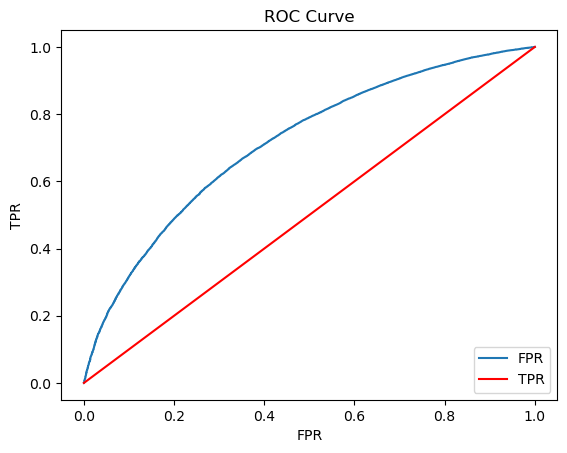

In [78]:
fpr, tpr, threshold = roc_curve(y_true=y_test,y_score=y_pred)

plt.plot(fpr, tpr);
plt.plot([0,1], [0,1], color='r');
plt.xlabel('FPR');
plt.ylabel('TPR');
plt.legend(["FPR", "TPR"], loc="lower right")

plt.title('ROC Curve');

### Using sklearn

In [79]:
from sklearn.linear_model import LogisticRegression

In [81]:
y=loan['loan_status']
X=loan.drop('loan_status',axis=1)

In [82]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [87]:
y_test.shape

(71146,)

In [105]:
logreg=LogisticRegression(max_iter=1000,penalty='l1',solver='liblinear',n_jobs=-1)
model=logreg.fit(X_train,y_train)

In [106]:
y_pred_lr=model.predict(X_test)

In [107]:
cr_new=classification_report(y_true=y_test,y_pred=y_pred_lr)
print(cr_new)

              precision    recall  f1-score   support

           0       0.52      0.09      0.15     14343
           1       0.81      0.98      0.89     56803

    accuracy                           0.80     71146
   macro avg       0.67      0.53      0.52     71146
weighted avg       0.75      0.80      0.74     71146



# -------------------------------------- OLD Method -------------------------------------

In [41]:
logReg_1 = sm.Logit(y_train, X_train)

logReg_1 = logReg_1.fit()

         Current function value: 0.453861
         Iterations: 35


In [42]:
logReg_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                         Results: Logit
================================================================================================
Model:                        Logit                      Pseudo R-squared:           0.097      
Dependent Variable:           loan_status                AIC:                        258853.2111
Date:                         2021-12-06 09:23           BIC:                        259581.8718
No. Observations:             285016                     Log-Likelihood:             -1.2936e+05
Df Model:                     68                         LL-Null:                    -1.4323e+05
Df Residuals:                 284947                     LLR p-value:                0.0000     
Converged:                    0.0000                     Scale:                      1.0000     
No. Iterations:               35.0000                                                           
------------------------------------------------------------------------------------------------
                                     Coef.    Std.Err.     z     P>|z|     [0.025       0.975]  
------------------------------------------------------------------------------------------------
const                                0.3563  89858.8101   0.0000 1.0000 -176119.6752 176120.3878
loan_amnt                            0.0000      0.0000   4.3752 0.0000       0.0000      0.0000
term                                -0.0227      0.0012 -18.6286 0.0000      -0.0251     -0.0203
int_rate                             0.1799      0.0058  30.9714 0.0000       0.1685      0.1913
installment                         -0.0009      0.0001  -6.3024 0.0000      -0.0012     -0.0006
annual_inc                           0.0000      0.0000  18.0078 0.0000       0.0000      0.0000
dti                                 -0.0226      0.0007 -32.4513 0.0000      -0.0239     -0.0212
open_acc                            -0.0213      0.0014 -15.4021 0.0000      -0.0240     -0.0186
pub_rec                             -0.0668      0.0124  -5.3912 0.0000      -0.0911     -0.0425
revol_bal                            0.0000      0.0000   7.6004 0.0000       0.0000      0.0000
revol_util                          -0.0033      0.0002 -13.3987 0.0000      -0.0037     -0.0028
total_acc                            0.0088      0.0006  13.8006 0.0000       0.0076      0.0101
mort_acc                             0.0269      0.0031   8.5646 0.0000       0.0207      0.0330
pub_rec_bankruptcies                 0.0808      0.0186   4.3514 0.0000       0.0444      0.1172
sub_grade_A1                         3.9432 136704.2144   0.0000 1.0000 -267931.3936 267939.2800
sub_grade_A2                         3.3238 136489.7015   0.0000 1.0000 -267511.5754 267518.2231
sub_grade_A3                         3.0800 137629.9068   0.0000 1.0000 -269746.5805 269752.7406
sub_grade_A4                         2.8116 136408.5755   0.0000 1.0000 -267353.0836 267358.7069
sub_grade_A5                         2.5063 137345.7429   0.0000 1.0000 -269190.2032 269195.2158
sub_grade_B1                         2.2812 136847.0362   0.0000 1.0000 -268212.9812 268217.5435
sub_grade_B2                         1.9854 136899.3669   0.0000 1.0000 -268315.8432 268319.8139
sub_grade_B3                         1.7313 136274.8510   0.0000 1.0000 -267092.0686 267095.5312
sub_grade_B4                         1.4920 136231.8402   0.0000 1.0000 -267008.0083 267010.9923
sub_grade_B5                         1.2485 137089.4918   0.0000 1.0000 -268689.2180 268691.7150
sub_grade_C1                         1.0516 136737.5528   0.0000 1.0000 -267999.6273 268001.7305
sub_grade_C2                         0.8140 137402.6227   0.0000 1.0000 -269303.3779 269305.0058
sub_grade_C3                         0.6129 136889.8537   0.0000 1.0000 -268298.5701 268299.7960
sub_grade_C4                         0.4612 136184.0345   0.0000 1.0000 -266915.3417 266916.2641
sub_grade_C5   

In [43]:
logReg_1.pvalues

const                       9.999968e-01
loan_amnt                   1.213334e-05
term                        1.885613e-77
int_rate                   1.310778e-210
installment                 2.930919e-10
                               ...      
purpose_wedding             9.999876e-01
home_ownership_MORTGAGE              NaN
home_ownership_OTHER                 NaN
home_ownership_OWN                   NaN
home_ownership_RENT                  NaN
Length: 75, dtype: float64

In [44]:
significant_features = ['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies']

In [45]:
X_new_1 = X_scaled[significant_features]

In [46]:
X_new_1.shape

(356270, 13)

In [47]:
X_new_1.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0
1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0
2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0
3,7200.0,36,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0
4,24375.0,60,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0


### Modifying the model with new set of significant features: X_new_1

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_new_1, y,test_size=0.2, random_state=10)

In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((285016, 13), (71254, 13), (285016,), (71254,))

In [50]:
logReg_2 = sm.Logit(y_train, X_train)
logReg_2 = logReg_2.fit()

Optimization terminated successfully.
         Current function value: 0.481194
         Iterations 6


In [51]:
logReg_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                Logit             Pseudo R-squared:  0.042      
Dependent Variable:   loan_status       AIC:               274321.8669
Date:                 2021-12-06 09:23  BIC:               274459.1508
No. Observations:     285016            Log-Likelihood:    -1.3715e+05
Df Model:             12                LL-Null:           -1.4323e+05
Df Residuals:         285003            LLR p-value:       0.0000     
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       6.0000                                          
----------------------------------------------------------------------
                      Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
loan_amnt            -0.0003   0.0000 -113.0240 0.0000 -0.0003 -0.0003
term                  0.0770   0.0008  102.2203 0.0000  0.0755  0.0785
int_rate             -0.1507   0.0015 -101.3862 0.0000 -0.1536 -0.1478
installment           0.0100   0.0001  105.4450 0.0000  0.0098  0.0101
annual_inc            0.0000   0.0000   40.2961 0.0000  0.0000  0.0000
dti                  -0.0139   0.0007  -21.1612 0.0000 -0.0152 -0.0126
open_acc             -0.0036   0.0014   -2.6149 0.0089 -0.0063 -0.0009
pub_rec              -0.0973   0.0123   -7.9317 0.0000 -0.1213 -0.0732
revol_bal             0.0000   0.0000    1.1424 0.2533 -0.0000  0.0000
revol_util            0.0026   0.0002   11.7739 0.0000  0.0022  0.0030
total_acc             0.0105   0.0006   16.6554 0.0000  0.0093  0.0118
mort_acc              0.0618   0.0029   21.6829 0.0000  0.0562  0.0674
pub_rec_bankruptcies  0.1245   0.0184    6.7736 0.0000  0.0885  0.1606
======================================================================

"""

In [52]:
X_new_2 = X_new_1.drop(['revol_bal'], axis=1)

In [53]:
X_new_2.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,41.8,25.0,0.0,0.0
1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,53.3,27.0,3.0,0.0
2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,92.2,26.0,0.0,0.0
3,7200.0,36,6.49,220.65,54000.0,2.60,6.0,0.0,21.5,13.0,0.0,0.0
4,24375.0,60,17.27,609.33,55000.0,33.95,13.0,0.0,69.8,43.0,1.0,0.0


### Modifying the model with new set of significant features: X_new_2

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_new_2, y, test_size=0.2, random_state=10)

In [55]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((285016, 12), (71254, 12), (285016,), (71254,))

In [56]:
log_reg_3 = sm.Logit(y_train, X_train)

log_reg_3 = log_reg_3.fit()

Optimization terminated successfully.
         Current function value: 0.481196
         Iterations 6


In [57]:
log_reg_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                Logit             Pseudo R-squared:  0.042      
Dependent Variable:   loan_status       AIC:               274321.1894
Date:                 2021-12-06 09:23  BIC:               274447.9130
No. Observations:     285016            Log-Likelihood:    -1.3715e+05
Df Model:             11                LL-Null:           -1.4323e+05
Df Residuals:         285004            LLR p-value:       0.0000     
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       6.0000                                          
----------------------------------------------------------------------
                      Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
loan_amnt            -0.0003   0.0000 -114.9856 0.0000 -0.0003 -0.0003
term                  0.0769   0.0007  103.3518 0.0000  0.0754  0.0783
int_rate             -0.1507   0.0015 -101.4702 0.0000 -0.1536 -0.1478
installment           0.0099   0.0001  106.4468 0.0000  0.0098  0.0101
annual_inc            0.0000   0.0000   41.3615 0.0000  0.0000  0.0000
dti                  -0.0138   0.0007  -21.2155 0.0000 -0.0151 -0.0126
open_acc             -0.0034   0.0014   -2.4782 0.0132 -0.0060 -0.0007
pub_rec              -0.0977   0.0123   -7.9696 0.0000 -0.1217 -0.0737
revol_util            0.0027   0.0002   12.4103 0.0000  0.0023  0.0031
total_acc             0.0105   0.0006   16.6171 0.0000  0.0092  0.0117
mort_acc              0.0621   0.0028   21.8745 0.0000  0.0565  0.0677
pub_rec_bankruptcies  0.1238   0.0184    6.7386 0.0000  0.0878  0.1598
======================================================================

"""

### Findings from final set of significant features

Z = -0.0003 x 'loan_amnt' + 0.0769 x 'term' + -0.1507 x 'int_rate' + 0.0099 x 'installment' + 0.0000 x 'annual_inc' + -0.0138 x 'dti' + -0.0034 x 'open_acc' + -0.0977 x 'pub_rec' + 0.0027 x 'revol_util' + 0.0105 x 'total_acc' + 0.0621 x 'mort_acc' + 0.1238 x 'pub_rec_bankruptcies'

$ f(Z) = \frac{e^{Z}} {1+e^{Z}}$, which is a prob lies in between 0 and 1

If f(z) lies in between 0 and 0.5. ===> Class 0

Otherwise ====> Class 1

### Prediction using the model

In [58]:
y_pred=log_reg_3.predict(X_test)

In [59]:
y_pred.head(20)

pred_df= pd.DataFrame({'Actual_Class':y_test, 'Predicted_Prob':y_pred})

In [60]:
pred_df['Predicted_Class'] = pred_df['Predicted_Prob'].map(lambda x: 1 if x>0.5 else 0)

In [61]:
pred_df.head(15)

,Actual_Class,Predicted_Prob,Predicted_Class
372463,1,0.819981,1
13687,0,0.535789,1
117889,1,0.859647,1
364824,1,0.750716,1
228747,0,0.872475,1
388978,1,0.625762,1
153513,0,0.749781,1
45477,0,0.889299,1
247875,1,0.934947,1
112175,1,0.911730,1


In [62]:
pred_df.apply(pd.value_counts)

,Actual_Class,Predicted_Prob,Predicted_Class
0.000000,14311.0,NaN,1150.0
0.016596,NaN,1.0,NaN
0.043945,NaN,1.0,NaN
0.068626,NaN,1.0,NaN
0.162951,NaN,1.0,NaN
...,...,...,...
0.999945,NaN,1.0,NaN
0.999957,NaN,1.0,NaN
0.999957,NaN,1.0,NaN
0.999987,NaN,1.0,NaN


### Performance Metrics

In [63]:
cm = confusion_matrix(pred_df['Actual_Class'], pred_df['Predicted_Class'])

print('Confusion matrix is given by:\n', cm)

Confusion matrix is given by:
 [[  384 13927]
 [  766 56177]]


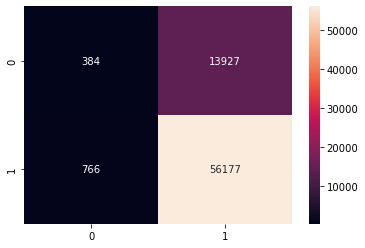

In [64]:
sns.heatmap(cm, annot=True, fmt='0.0f');

In [65]:
report = classification_report(pred_df['Actual_Class'], pred_df['Predicted_Class'])

print('The Classification report of the model:\n', report)

The Classification report of the model:
               precision    recall  f1-score   support

           0       0.33      0.03      0.05     14311
           1       0.80      0.99      0.88     56943

    accuracy                           0.79     71254
   macro avg       0.57      0.51      0.47     71254
weighted avg       0.71      0.79      0.72     71254



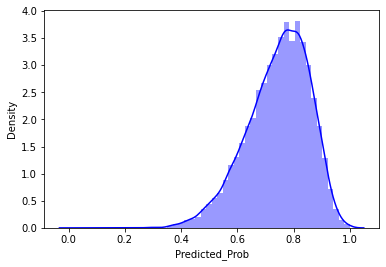

In [66]:
sns.distplot(pred_df[pred_df['Actual_Class']==0]['Predicted_Prob'], color='b');

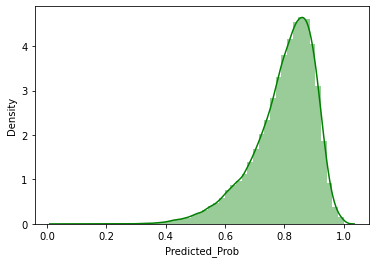

In [67]:
sns.distplot(pred_df[pred_df['Actual_Class']==1]['Predicted_Prob'], color='g');

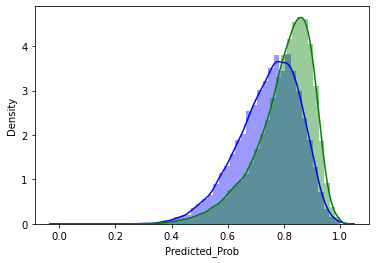

In [68]:
sns.distplot(pred_df[pred_df['Actual_Class']==0]['Predicted_Prob'], color='b');

sns.distplot(pred_df[pred_df['Actual_Class']==1]['Predicted_Prob'], color='g');

ROC AUC score: 0.6538649993617158


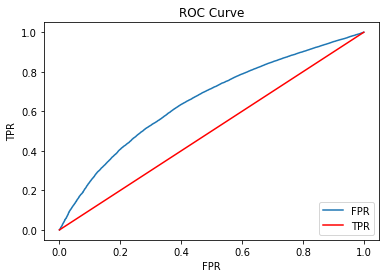

In [69]:
fpr, tpr, threshold = roc_curve(pred_df['Actual_Class'], pred_df['Predicted_Prob'])

plt.plot(fpr, tpr);
plt.plot([0,1], [0,1], color='r');
plt.xlabel('FPR');
plt.ylabel('TPR');
plt.legend(["FPR", "TPR"], loc="lower right")

plt.title('ROC Curve');

score = roc_auc_score(pred_df['Actual_Class'], pred_df['Predicted_Prob'])

print('ROC AUC score:', score)

In [70]:
fpr_tpr = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'threshold':threshold})
fpr_tpr.head(15)

,fpr,tpr,threshold
0,0.000000,0.000000,2.000000
1,0.000070,0.000035,1.000000
2,0.000070,0.000070,0.999957
3,0.000140,0.000070,0.999957
4,0.000140,0.000158,0.999902
5,0.000210,0.000158,0.999811
6,0.000210,0.000299,0.999554
7,0.000280,0.000299,0.999428
8,0.000280,0.000369,0.998730
9,0.000349,0.000369,0.998555


In [71]:
fpr_tpr['diff'] = fpr_tpr['tpr'] - fpr_tpr['fpr']
fpr_tpr

,fpr,tpr,threshold,diff
0,0.00000,0.000000,2.000000,0.000000e+00
1,0.00007,0.000035,1.000000,-3.475348e-05
2,0.00007,0.000070,0.999957,3.693654e-07
3,0.00014,0.000070,0.999957,-6.950695e-05
4,0.00014,0.000158,0.999902,1.830015e-05
...,...,...,...,...
21843,0.99979,0.999965,0.217740,1.745061e-04
21844,0.99979,0.999982,0.191486,1.920675e-04
21845,0.99993,0.999982,0.068626,5.231490e-05
21846,0.99993,1.000000,0.043945,6.987632e-05


In [72]:
fpr_tpr.sort_values('diff', ascending= False)

,fpr,tpr,threshold,diff
9534,0.391377,0.626714,0.786922,0.235337
9538,0.391517,0.626837,0.786895,0.235320
9536,0.391447,0.626767,0.786909,0.235320
9526,0.391028,0.626346,0.787035,0.235318
9544,0.391797,0.627101,0.786812,0.235304
...,...,...,...,...
15,0.000629,0.000597,0.996352,-0.000032
1,0.000070,0.000035,1.000000,-0.000035
5,0.000210,0.000158,0.999811,-0.000052
13,0.000559,0.000492,0.996896,-0.000067


The threshold which gives the max (TPR - FPR)  is 0.786922.

In [73]:
pred_df['Predicted_New_Class'] = pred_df['Predicted_Prob'].map(lambda x: 1 if x>0.786922 else 0)

In [74]:
pred_df.head(20)

,Actual_Class,Predicted_Prob,Predicted_Class,Predicted_New_Class
372463,1,0.819981,1,1
13687,0,0.535789,1,0
117889,1,0.859647,1,1
364824,1,0.750716,1,0
228747,0,0.872475,1,1
388978,1,0.625762,1,0
153513,0,0.749781,1,0
45477,0,0.889299,1,1
247875,1,0.934947,1,1
112175,1,0.911730,1,1


In [75]:
cm_new = confusion_matrix(pred_df['Actual_Class'], pred_df['Predicted_New_Class'])

In [76]:
print('Confusion Matrix:\n', cm_new)

Confusion Matrix:
 [[ 8710  5601]
 [21257 35686]]


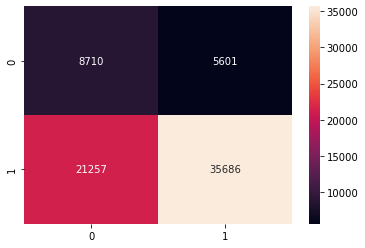

In [77]:
sns.heatmap(cm_new,annot=True, fmt='0.0f');

In [78]:
new_report = classification_report(pred_df['Actual_Class'], pred_df['Predicted_New_Class'])

In [79]:
print('Final Classification Report:\n', new_report)

Final Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.61      0.39     14311
           1       0.86      0.63      0.73     56943

    accuracy                           0.62     71254
   macro avg       0.58      0.62      0.56     71254
weighted avg       0.75      0.62      0.66     71254

